# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [3]:
df = pd.read_csv("titanic.csv")

### Task 1
Display the first 7 rows of the table and the table dimensions.

In [5]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,Braund; Mr. Owen Harris,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,Heikkinen; Miss. Laina,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,Allen; Mr. William Henry,male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,0.0,1.0,McCarthy; Mr. Timothy J,male,54.0,0.0,0.0,17463,51.8625,E46,S


In [6]:
df.shape

(891, 12)

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,886.000000,886.000000,886.000000,711.000000,886.000000,886.000000,886.000000
mean,448.316027,0.383747,2.305869,29.743094,0.523702,0.375847,32.279387
std,256.211467,0.486572,0.837071,14.505873,1.105202,0.791082,49.817969
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,20.750000,0.000000,0.000000,7.903100
50%,448.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3
Check if there are missing values in the column.

In [8]:
df.Sex.isna().sum()

5

### Task 4
You should get 5 in the previous task. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [21]:
idxs = np.where(df.Sex.isna())[0]
df = df.drop(idxs)

In [22]:
df.shape, df.Sex.isna().sum()

((886, 12), 0)

The `Sex` feature is categorical, i.e. it contains non-numeric values. For most algorithms to work, it is necessary to map categories into numbers. How can this be done? 

### Task 5 
Encode the categorical features with any method. For example, you can values to 0 and 1, since this feature is binary (the function `.replace` does it).

In [23]:
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
# alternative 
df = df.sex({"male" : 1,"female" : 0})

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,Braund; Mr. Owen Harris,0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,Heikkinen; Miss. Laina,1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,Allen; Mr. William Henry,0,35.0,0.0,0.0,373450,8.0500,NaN,S


Let's see how gender affects survival rates.

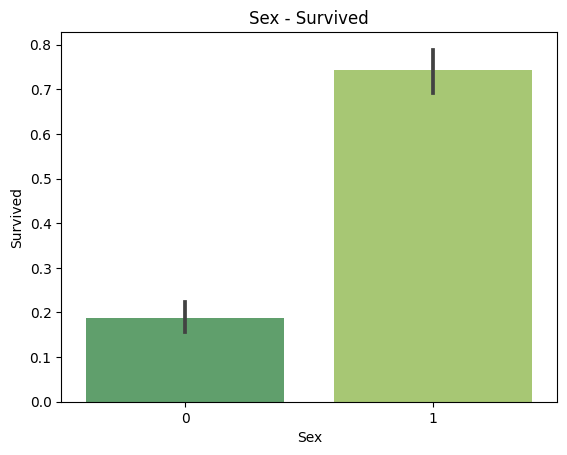

In [25]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Let's see how a person's gender and ticket class (Pclass) affect survival rates

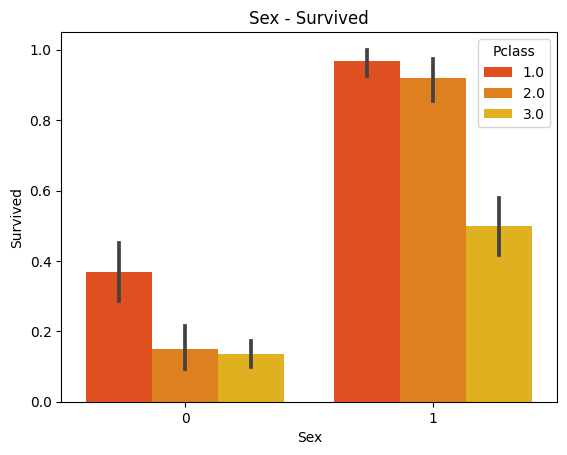

In [26]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

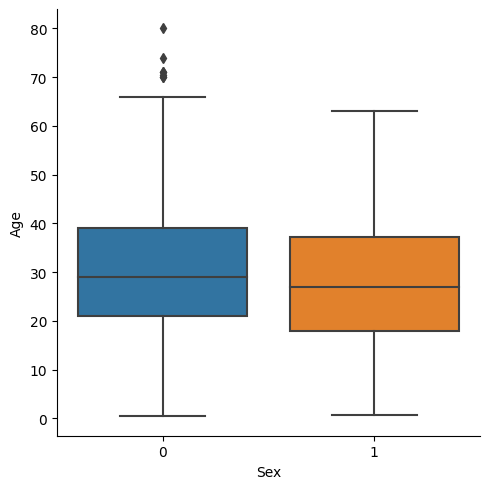

In [27]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")
plt.show()

We can detail the picture by adding Pclass separation.

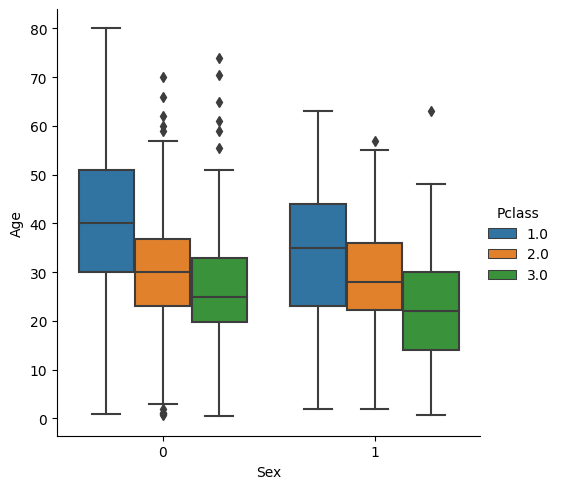

In [28]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=df, kind="box")
plt.show()

## Process the 'Embarked' feature

In [29]:
print(df['Embarked'].value_counts(dropna=False))
df.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

### Task 6
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [30]:
idxs = np.where(df.Embarked.isna())[0]
df = df.drop(idxs)

In [31]:
df.shape

(884, 12)

Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [ ]:
# df['EmbS'] = df.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# df['EmbC'] = df.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# df['EmbQ'] = df.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [32]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


### Task 7
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [33]:
df = pd.concat((df, pd.get_dummies(df.Embarked)), axis=1)
df.drop(columns='Embarked', inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1.0,0.0,3.0,Braund; Mr. Owen Harris,0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1
1,2.0,1.0,1.0,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1.0,0.0,PC 17599,71.2833,C85,1,0,0
2,3.0,1.0,3.0,Heikkinen; Miss. Laina,1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4.0,1.0,1.0,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1.0,0.0,113803,53.1000,C123,0,0,1
4,5.0,0.0,3.0,Allen; Mr. William Henry,0,35.0,0.0,0.0,373450,8.0500,NaN,0,0,1


## Process the 'Age' feature

Check if `Age` has any missing values.

In [35]:
df.Age.isna().sum()

175

Let's fill in the blanks with the median `Age` value.

In [36]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Let's plot the age distribution of the passengers.

/var/folders/_s/hy3frgt54mzcdglxl00k5kyw0000gn/T/ipykernel_13155/755151933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False)


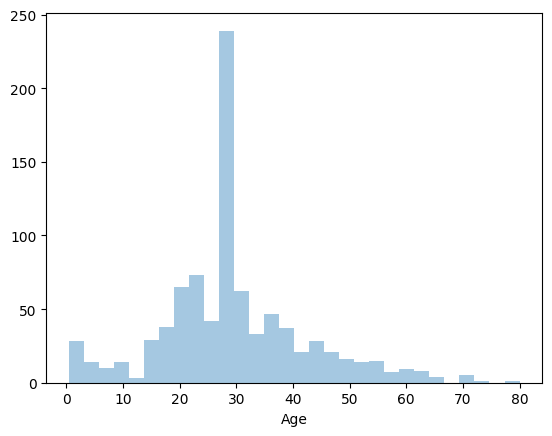

In [37]:
sns.distplot(df['Age'], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

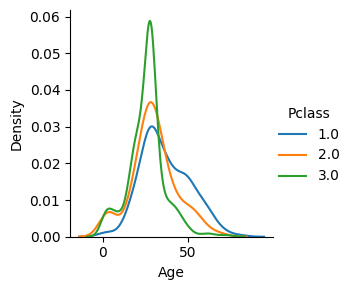

In [38]:
import seaborn as sns

facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

### Process the 'Fare' feature

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [39]:
median_fare = df['Fare'].median()

df['Fare'].fillna(median_fare, inplace=True)

### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [40]:
df['Pclass'].value_counts(dropna=False)

3.0    485
1.0    216
2.0    183
Name: Pclass, dtype: int64

### Task 8
Draw a histogram of survival rates as a function of `Pclass`.

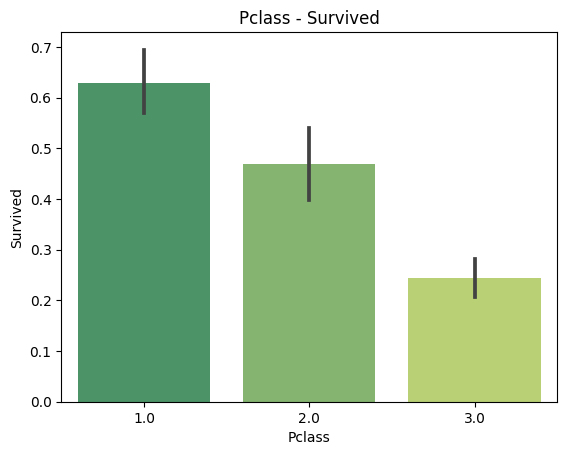

In [42]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='summer')
plt.title('Pclass - Survived')
plt.show()

### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [43]:
df['SibSp'].value_counts(dropna=False)

0.0    604
1.0    207
2.0     28
4.0     17
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

### Task 9
The `PassengerId` column is categorical and does not carry important information, delete it.

In [44]:
df.drop(columns='PassengerId', inplace=True)

In [45]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0.0,3.0,Braund; Mr. Owen Harris,0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1
1,1.0,1.0,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1.0,0.0,PC 17599,71.2833,C85,1,0,0
2,1.0,3.0,Heikkinen; Miss. Laina,1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1.0,1.0,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1.0,0.0,113803,53.1000,C123,0,0,1
4,0.0,3.0,Allen; Mr. William Henry,0,35.0,0.0,0.0,373450,8.0500,NaN,0,0,1


In [46]:
df.shape

(884, 13)